In [4]:
! pip3 install h2o

  Using cached h2o-3.40.0.1-py2.py3-none-any.whl (177.7 MB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 9.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=f0956d53cbd10cd106e42eff18e117304e8cd9d77c22b4a933e5a8af5125ab39
  Stored in directory: /Users/anisoft/Library/Caches/pip/wheels/da/19/ca/9d8c44cd311a955509d7e13da3f0bea42400c469ef825b580b
Successfully built future


In [5]:
import h2o
from h2o.automl import H2OAutoML

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "19.0.1" 2022-10-18; OpenJDK Runtime Environment (build 19.0.1+10-21); OpenJDK 64-Bit Server VM (build 19.0.1+10-21, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/5m/0wtbmlrn47qgsg9b8mg059gr0000gn/T/tmpk4_db399
  JVM stdout: /var/folders/5m/0wtbmlrn47qgsg9b8mg059gr0000gn/T/tmpk4_db399/h2o_anisoft_started_from_python.out
  JVM stderr: /var/folders/5m/0wtbmlrn47qgsg9b8mg059gr0000gn/T/tmpk4_db399/h2o_anisoft_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Europe/Paris
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    7 days, 2 hours and 32 minutes
H2O_cluster_name:           H2O_from_python_anisoft_vc098o
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.0 final
--------------------------  ------------------------------

### Data Preparation
#### We will be using a dataset from UCI which describes a bank’s marketing campaign which offers clients to place a term deposit. The target variable is yes if the customer agrees and no if the customer decides not to place a term deposit.

In [7]:
import pandas as pd

In [8]:
df = h2o.import_file("bank-additional-full.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
#summary of dataframe
df.describe(chunk_summary=True)

Rows:41188
Cols:21

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              93       13.8393             7.3 KB    1.11408
C0D           Constant double            87       12.9464             6.8 KB    1.04221
CBS           Binary                     35       5.20833             7.9 KB    1.21186
CXI           Sparse Integers            52       7.7381              12.2 KB   1.86699
C1N           1-Byte Integers (w/o NAs)  294      43.75               389.3 KB  59.6939
C1S           1-Byte Fractions           47       6.99405             63.0 KB   9.65433
C2            2-Byte Integers            46       6.84524             118.9 KB  18.2356
C2S           2-Byte Fractions           18       2.67857             46.8 KB   7.18104

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  652.2 KB  41188             32                             672
mean             652.2 KB  41188             32                             672
min              652.2 KB  41188             32                             672
max              652.2 KB  41188             32                             672
stddev           0  B      0                 0                              0
total            652.2 KB  41188             32                             672

age                 job          marital    education            default    housing    loan    contact    month    day_of_week    duration            campaign            pdays               previous             poutcome     emp.var.rate         cons.price.idx      cons.conf.idx       euribor3m          nr.employed        y
-------  ------------------  -----------  ---------  -------------------  ---------  ---------  ------  ---------  -------  -------------  ------------------  ------------------  ------------------  -------------------  -----------  -------------------  ------------------  ------------------  -----------------  -----------------  ----
type     int                 enum         enum       enum                 enum       enum       enum    enum       enum     enum           int                 int                 int                 int                  enum         real                 real                real                real               real               enum
mins     17.0                                                                                                                              0.0                 1.0                 0.0                 0.0                               -3.4                 92.201              -50.8               0.634              4963.6
mean     40.02406040594348                                                                                                                 258.2850101971447   2.567592502670681   962.4754540157328   0.17296299893172778               0.08188550063125201  93.57566436826262   -40.50260027192386  3.621290812858115  5167.035910944936
maxs     98.0                                                                                                                              4918.0              56.0                999.0               7.0                               1.4                  94.767              -26.9               5.045              5228.1
sigma    10.421249980934045                                                                                                                259.27924883646483  2.7700135429023276  186.91090734474184  0.4949010798392899                1.5709597405170255   0.5788400489540924  4.6281978561745385  1.734447404851268  72.25152766826197
zeros    0                                                                                                                                 4                   0                   15                  35563                             0                    0                   0                   0                  0
missing  0                   0            0          0                    0          0          0       0          0        0              0                   0                   0                   0                    0            0                    0                   0                   0                  0                  0
0        56.0                housemaid    married    basic.4y             no         no         no      telephone  may      mon            261.0               1.0                 999.0               0.0                  nonexistent  1.1                  93.994              -36.4               4.857              5191.0             no
1        57.0                services     married    high.school          unknown    no         no      telephone  may      mon            149.0               1.0                 999.0               0.0                  nonexistent  1.1                  93.994              -36.4               4.857              5191.0             no
2        37.0                services     married    high.school          no         yes        no      telephone  may      mon            226.0               1.0                 999.0               0.0                  nonexistent  1.1                  93.994              -36.4               4.857              5191.0             no
3        40.0                admin.       mar

In [10]:
#split data into train and test
train, test = df.split_frame(ratios=[0.8], seed = 1)

### Train AutoML Models

Let's configure the AutoML training parameters.

* max_models: Maximum number of models to train
* balance_classes: set to True to balance the class labels for tasks with imbalance data
* seed : Set for reproducibility


In [11]:
aml = H2OAutoML(max_models=25, balance_classes = True, seed = 1)

We can limit the amount of time spent on searching for the best model by limiting:

* maximum number of models using max_models
* total time spent using max_runtime_secs
* time spend training any single model using max_runtime_secs_per_model.
Start the training by specifying:

* training_frame: the dataframe that contains training data
* y: the column in the training_frame which contains the target variable

In [12]:
aml.train(training_frame = train, y = 'y')

AutoML progress: |
21:01:02.597: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230215_210102


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       18/25
# GBM base models (used / total)           9/12
# DRF base models (used / total)           2/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  7/10
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0364234835151392
RMSE: 0.19084937389244744
LogLoss: 0.1199830606150986
AUC: 0.9808874299119876
AUCPR: 0.8781385316189596
Gini: 0.9617748598239753
Null degrees of freedom: 10093
Residual degrees of freedom: 10075
Null deviance: 7097.977460398361
Residual deviance: 2422.2180276976105
AIC: 2460.2180276976105

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4842020763468059
       no    yes    Error    Rate
-----  ----  -----  -------  ---------------
no     8740  219    0.0244   (219.0/8959.0)
yes    260   875    0.2291   (260.0/1135.0)
Total  9000  1094   0.0475   (479.0/10094.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.484202     0.785105  161
max f2                       0.279909     0.843238  236
max f0point5                 0.608975     0.825623  115
max accuracy                 0.484202     0.952546  161
max precision                0.971192     1         0
max recall                   0.0297126    1         357
max specificity              0.971192     1         0
max absolute_mcc             0.484202     0.758606  161
max min_per_class_accuracy   0.271465     0.926666  239
max mean_per_class_accuracy  0.152676     0.930845  288
max tns                      0.971192     8959      0
max fns                      0.971192     1131      0
max fps                      0.000282766  8959      399
max tps                      0.0297126    1135      357
max tnr                      0.971192     1         0
max fnr                      0.971192     0.996476  0
max fpr                      0.000282766  1         399
max tpr                      0.0297126    1         357

Gains/Lift Table: Avg response rate: 11.24 %, avg score: 11.71 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100059                   0.908231           8.89339     8.89339            1                0.939741     1                           0.939741            0.0889868       0.0889868                  789.339   789.339            0.0889868
2        0.0200119                   0.848574           8.89339     8.89339            1                0.879218     1                           0.909479            0.0889868       0.177974                   789.339   789.339            0.177974
3        0.0300178                   0.782229           8.54118     8.77599            0.960396         0.818084     0.986799                    0.879014            0.0854626       0.263436                   754.118   777.599            0.26299
4        0.0400238                 

### Evaluation
After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

In [13]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_1_20230215_210102     0.950998   0.169988  0.67835                 0.147702  0.23386   0.0546905
StackedEnsemble_BestOfFamily_1_AutoML_1_20230215_210102  0.950497   0.170588  0.676795                0.143336  0.234239  0.0548681
GBM_grid_1_AutoML_1_20230215_210102_model_2              0.950049   0.172208  0.672894                0.149602  0.235262  0.055348
GBM_grid_1_AutoML_1_20230215_210102_model_6              0.949847   0.173792  0.669343                0.15106   0.236735  0.0560434
GBM_grid_1_AutoML_1_20230215_210102_model_3              0.949758   0.174307  0.671616                0.148077  0.236885  0.0561143
GBM_grid_1_AutoML_1_20230215_210102_model_7              0.949129   0.174328  0.662607                0.156732  0.236675  0.0560152
GBM_5_AutoML_1_20230215_210102                           0.948369   0.176818  0.662992                0.149894  0.23851   0.0568872
GBM_1_AutoML_1_20230215_210102                           0.948272   0.180065  0.659906                0.155191  0.240584  0.0578807
GBM_2_AutoML_1_20230215_210102                           0.948183   0.178717  0.661221                0.15587   0.239659  0.0574366
GBM_3_AutoML_1_20230215_210102                           0.947115   0.18383   0.659511                0.156842  0.242256  0.058688
XRT_1_AutoML_1_20230215_210102                           0.94622    0.219565  0.652589                0.138344  0.267853  0.0717451
GBM_4_AutoML_1_20230215_210102                           0.94499    0.196566  0.645946                0.157185  0.248735  0.061869
GBM_grid_1_AutoML_1_20230215_210102_model_4              0.943701   0.202945  0.647008                0.146818  0.254346  0.064692
DRF_1_AutoML_1_20230215_210102                           0.942603   0.236804  0.637317                0.148068  0.271431  0.0736749
GBM_grid_1_AutoML_1_20230215_210102_model_5              0.942016   0.220245  0.633149                0.151394  0.257236  0.0661704
GBM_grid_1_AutoML_1_20230215_210102_model_1              0.938611   0.220294  0.638707                0.160397  0.262317  0.06881
GLM_1_AutoML_1_20230215_210102                           0.937036   0.207303  0.604825                0.182775  0.24962   0.0623104
DeepLearning_grid_3_AutoML_1_20230215_210102_model_1     0.936849   0.198332  0.612042                0.172199  0.247619  0.0613153
DeepLearning_grid_2_AutoML_1_20230215_210102_model_1     0.934263   0.201546  0.595065                0.16153   0.251425  0.0632144
DeepLearning_grid_3_AutoML_1_20230215_210102_model_2     0.933391   0.203235  0.601454                0.151348  0.253918  0.0644745
DeepLearning_1_AutoML_1_20230215_210102                  0.931583   0.205453  0.57696                 0.176828  0.254015  0.0645238
DeepLearning_grid_2_AutoML_1_20230215_210102_model_3     0.93109    0.214751  0.593423                0.176236  0.251862  0.0634347
DeepLearning_grid_2_AutoML_1_20230215_210102_model_2     0.93062    0.210321  0.593753                0.175552  0.259094  0.0671299
DeepLearning_grid_1_AutoML_1_20230215_210102_model_1     0.930466   0.212722  0.58693                 0.190794  0.254077  0.0645553
DeepLearning_grid_3_AutoML_1_20230215_210102_model_3     0.929061   0.209439  0.569595                0.172881  0.255753  0.0654098
DeepLearning_grid_1_AutoML_1_20230215_210102_model_2     0.927203   0.209195  0.596403                0.193624  0.253204  0.0641124
DeepLearning_grid_1_AutoML_1_20230215_210102_model_3     0.914728   0.2344    0.563738                0.187987  0.261531  0.0683986
[27 rows x 7 columns]

In a typical machine learning evaluation for classification task, we will be interested to know performance of the best performing model such as ROC AUC, Precision, Recall, F1, Accuracy, Gains/Lift and the confusion metrics on the cross validation dataset. H2O provides all these metrics with just 2 lines of code.

Let’s get the best performing model and examine its results.

In [14]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230215_210102


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       18/25
# GBM base models (used / total)           9/12
# DRF base models (used / total)           2/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  7/10
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0364234835151392
RMSE: 0.19084937389244744
LogLoss: 0.1199830606150986
AUC: 0.9808874299119876
AUCPR: 0.8781385316189596
Gini: 0.96177

Evaluation of the best model

In [15]:
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05731945002953768
RMSE: 0.23941480745671867
LogLoss: 0.1779994232117574
AUC: 0.9453923272730772
AUCPR: 0.6360965836569058
Gini: 0.8907846545461544
Null degrees of freedom: 8125
Residual degrees of freedom: 8107
Null deviance: 5686.431711522335
Residual deviance: 2892.846626037481
AIC: 2930.846626037481

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33393938102340703
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6668  551    0.0763   (551.0/7219.0)
yes    208   699    0.2293   (208.0/907.0)
Total  6876  1250   0.0934   (759.0/8126.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.333939     0.648122  212
max f2                       0.177521     0.757604  279
max f0point5                 0.544708     0.620915  127
max accuracy                 0.544708     0.91558   127
max precision                0.960648     1         0
max recall                   0.00175873   1         394
max specificity              0.960648     1         0
max absolute_mcc             0.316447     0.606785  219
max min_per_class_accuracy   0.195769     0.878721  271
max mean_per_class_accuracy  0.124826     0.885431  302
max tns                      0.960648     7219      0
max fns                      0.960648     905       0
max fps                      0.000309931  7219      399
max tps                      0.00175873   907       394
max tnr                      0.960648     1         0
max fnr                      0.960648     0.997795  0
max fpr                      0.000309931  1         399
max tpr                      0.00175873   1         394

Gains/Lift Table: Avg response rate: 11.16 %, avg score: 11.40 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100911                   0.84134            6.88329    6.88329            0.768293         0.887293     0.768293                    0.887293            0.0694598       0.0694598                  588.329   588.329            0.0668278
2        0.0200591                   0.764899           6.96827    6.92552            0.777778         0.804532     0.773006                    0.846166            0.0694598       0.13892                    596.827   592.552            0.133794
3        0.0300271                   0.707641           5.9728     6.60925            0.666667         0.732202     0.737705                    0.808334            0.0595369       0.198456                   497.28    560.925            0.189591
4        0.0401181                   0.660298           6.00922    6.45832            0.670732         0.684006     0.720859                    0.777061            0.0606395       0.259096                   500.922   545.832            0.24649
5        0.0500861                   0.626896           5.8622     6.33968            0.654321         0.641423     0.707617                    0.750067            0.0584344       0.31753                    486.22    533.968            0.301046
6        0.100049                    0.489574           4.94301    5.64221            0.551724         0.557813     0.629766                    0.654058            0.246968        0.564498                   394.301   464.221            0.522803
7        0.150012                    0.342999           3.83966    5.04185            0.428571         0.416547 

### Save, Load and Predict

Saving the best model to use it later

In [16]:
model_path = h2o.save_model(model=best_model,path="models", force=True)
print(model_path)

/Volumes/Second/EFREI/ING 2/MACHINE_LEARNING/Presentation/models/StackedEnsemble_AllModels_1_AutoML_1_20230215_210102


Loading of the model previously saved to make predictions on the test dataset 

In [17]:
loaded_model = h2o.load_model(model_path)
loaded_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict          no          yes
---------  --------  -----------
no         0.998912  0.00108846
no         0.999754  0.000246028
no         0.999761  0.000238591
yes        0.404797  0.595203
no         0.999609  0.000391032
no         0.997303  0.00269729
no         0.999649  0.00035072
no         0.993581  0.00641851
no         0.994879  0.00512098
no         0.999582  0.000418123
[8126 rows x 3 columns]

### Explainability
H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code



# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20230215_210102     0.945392   0.177999  0.636097                0.152827  0.239415  0.0573195               11643                   0.058333  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230215_210102  0.945171   0.178466  0.63539                 0.167963  0.239553  0.0573856                9401                   0.016475  StackedEnsemble
GBM_grid_1_AutoML_1_20230215_210102_model_2              0.944778   0.178888  0.636828                0.163907  0.239921  0.0575619                 960                   0.004144  GBM
GBM_5_AutoML_1_20230215_210102                           0.943716   0.181274  0.632045                0.152697  0.24149   0.0583174                 989                   0.004665  GBM
GBM_grid_1_AutoML_1_20230215_210102_model_7              0.942924   0.18146   0.636067                0.149478  0.241354  0.0582515                1216                   0.005006  GBM
GBM_3_AutoML_1_20230215_210102                           0.942902   0.18695   0.620842                0.158345  0.244957  0.0600039                 966                   0.003327  GBM
GBM_grid_1_AutoML_1_20230215_210102_model_6              0.942888   0.182642  0.618027                0.145478  0.242338  0.0587278                 927                   0.007317  GBM
GBM_grid_1_AutoML_1_20230215_210102_model_3              0.94287    0.182345  0.623384                0.14624   0.242595  0.0588521                 875                   0.004432  GBM
GBM_2_AutoML_1_20230215_210102                           0.942863   0.183616  0.62032                 0.147758  0.24365   0.0593652                 849                   0.005777  GBM
GBM_1_AutoML_1_20230215_210102                           0.941563   0.188151  0.617839                0.156151  0.245786  0.0604107                1405                   0.006832  GBM
XRT_1_AutoML_1_20230215_210102                           0.940112   0.22227   0.608847                0.151753  0.268818  0.0722632                1933                   0.006097  DRF
GBM_4_AutoML_1_20230215_210102                           0.93969    0.199614  0.60263                 0.154298  0.251728  0.0633671                 905                   0.003209  GBM
GBM_grid_1_AutoML_1_20230215_210102_model_5              0.937175   0.224004  0.59346                 0.146739  0.260343  0.0677785                1914                   0.005736  GBM
GBM_grid_1_AutoML_1_20230215_210102_model_4              0.936367   0.210083  0.602898                0.158576  0.258604  0.0668759                1641                   0.008554  GBM
DRF_1_AutoML_1_20230215_210102                           0.9362     0.239571  0.601572                0.158916  0.272821  0.0744311                1889                   0.006749  DRF
DeepLearning_grid_2_AutoML_1_20230215_210102_model_1     0.935312   0.204605  0.58986                 0.180512  0.252152  0.0635807              160368                   0.003677  DeepLearning
DeepLearning_grid_3_AutoML_1_20230215_210102_model_3     0.933541   0.225768  0.600825                0.157479  0.259365  0.0672701               60522                   0.003508  DeepLearning
GBM_grid_1_AutoML_1_20230215_210102_model_1              0.932369   0.22372   0.597246                0.152312  0.265246  0.0703553                1304                   0.005859  GBM
DeepLearning_grid_3_AutoML_1_20230215_210102_model_1     0.931277   0.200696  0.55935                 0.16713   0.253569  0.064297               290072                   0.01148   DeepLearning
DeepLearning_1_AutoML_1_20230215_210102                  0.930943   0.20

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230215_210102

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33393938102340703
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6668  551    0.0763   (551.0/7219.0)
yes    208   699    0.2293   (208.0/907.0)
Total  6876  1250   0.0934   (759.0/8126.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

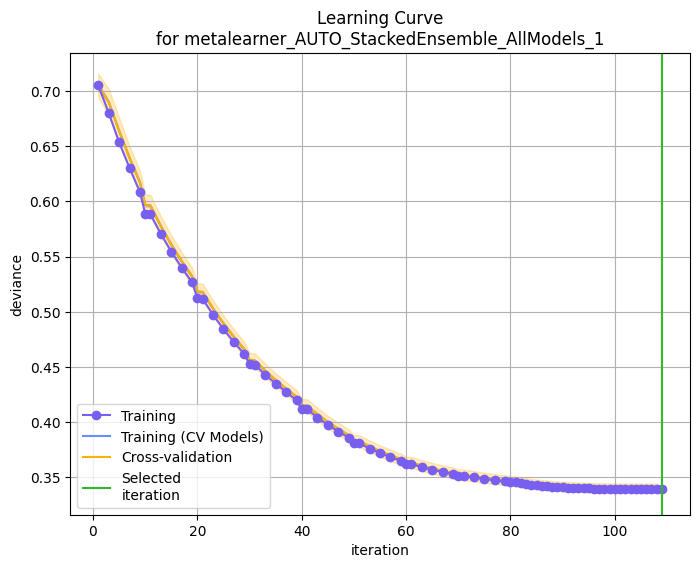

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

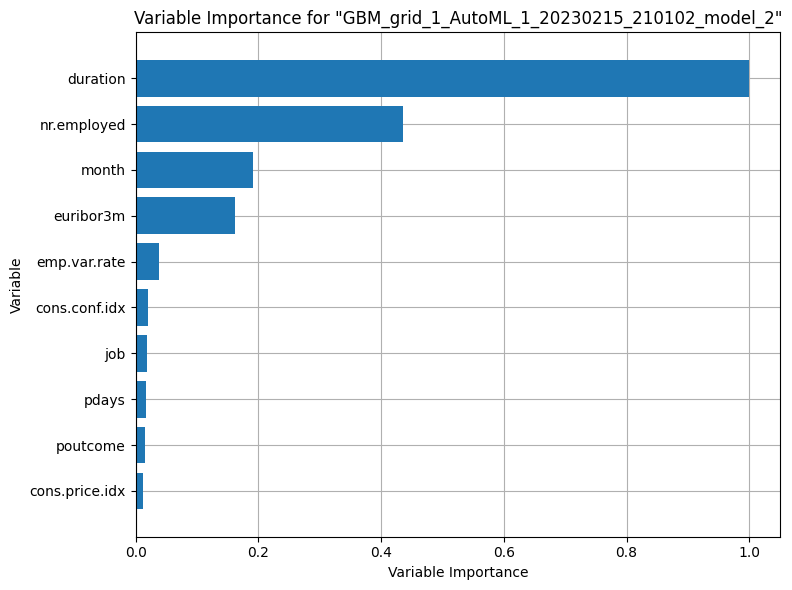

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

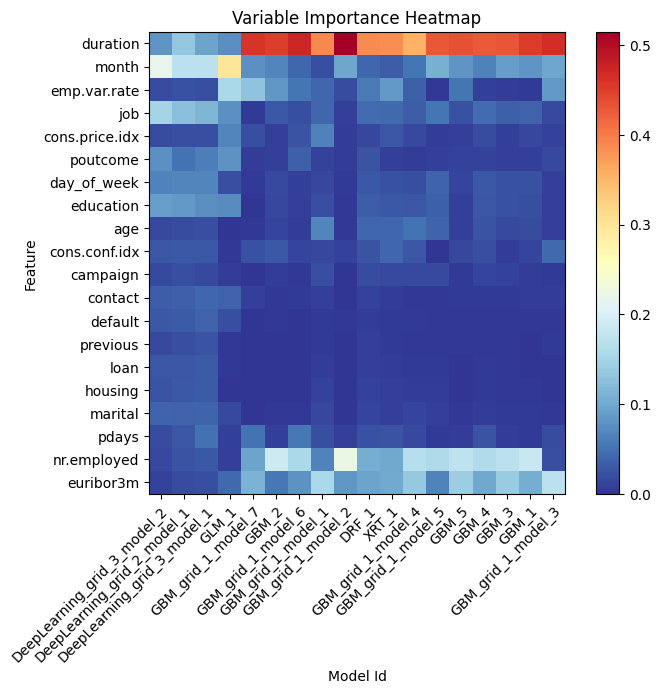

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

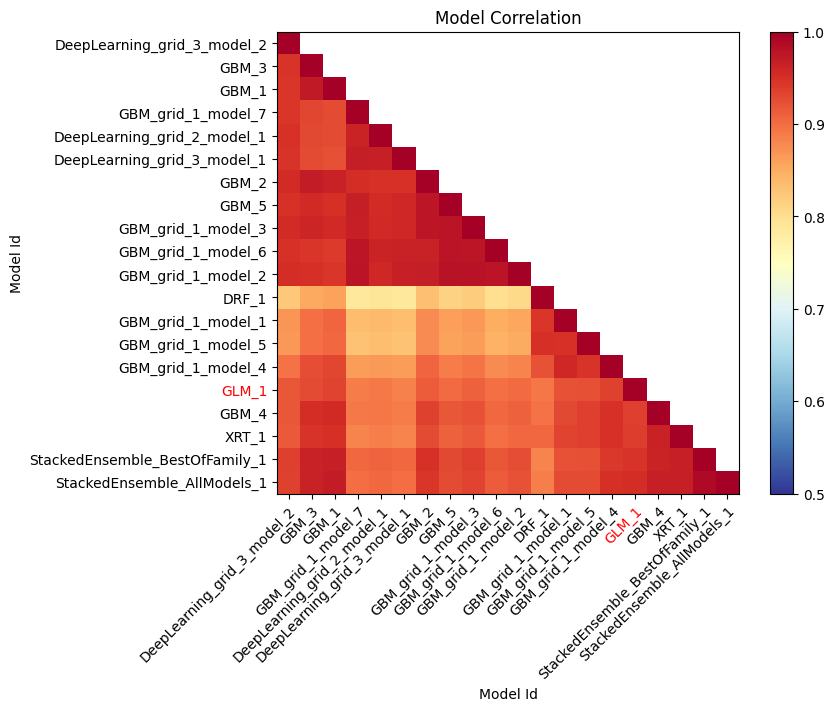

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

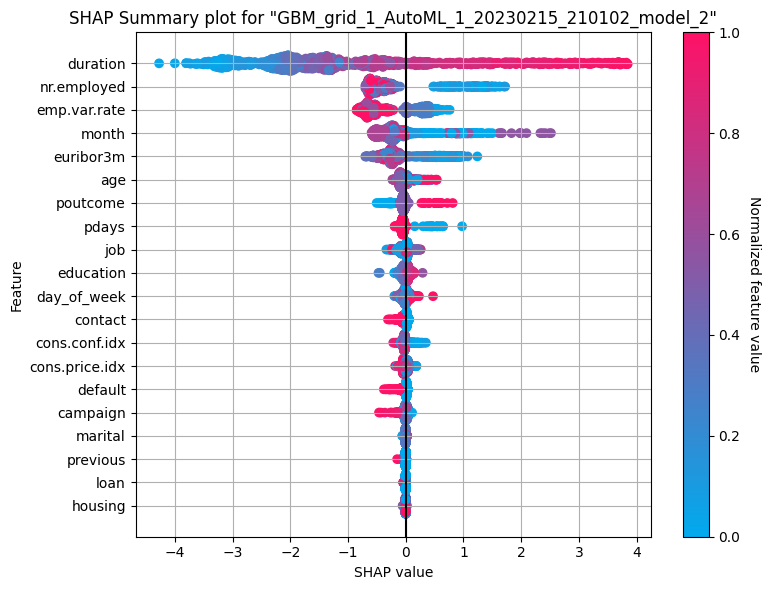

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

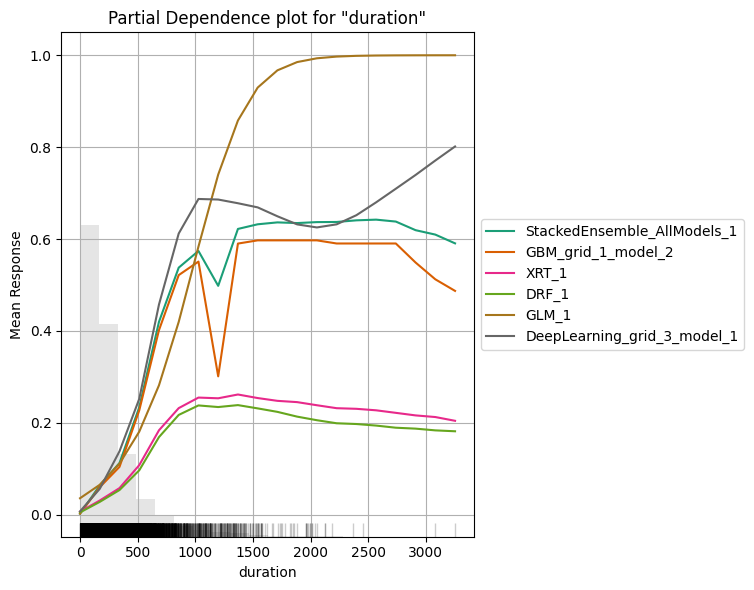

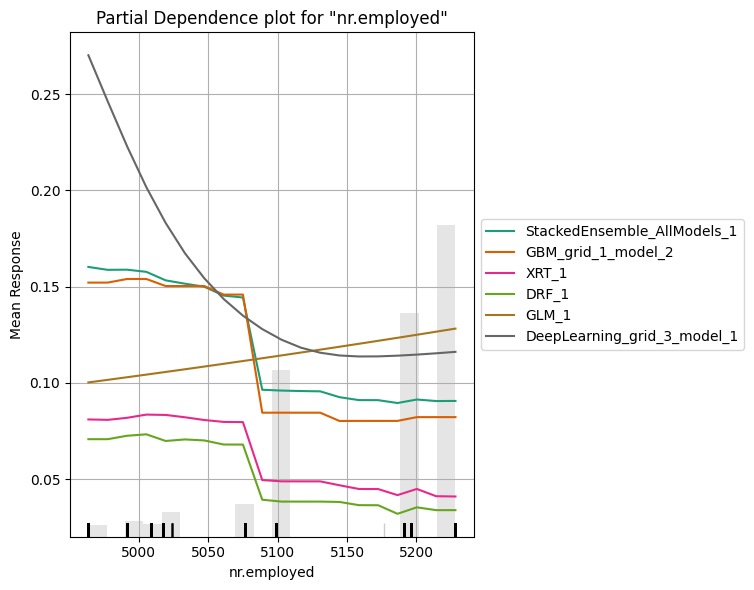

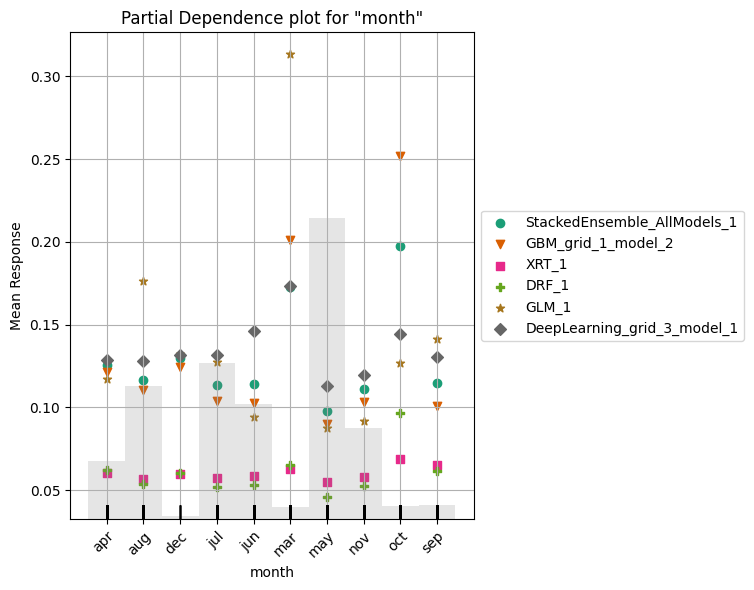

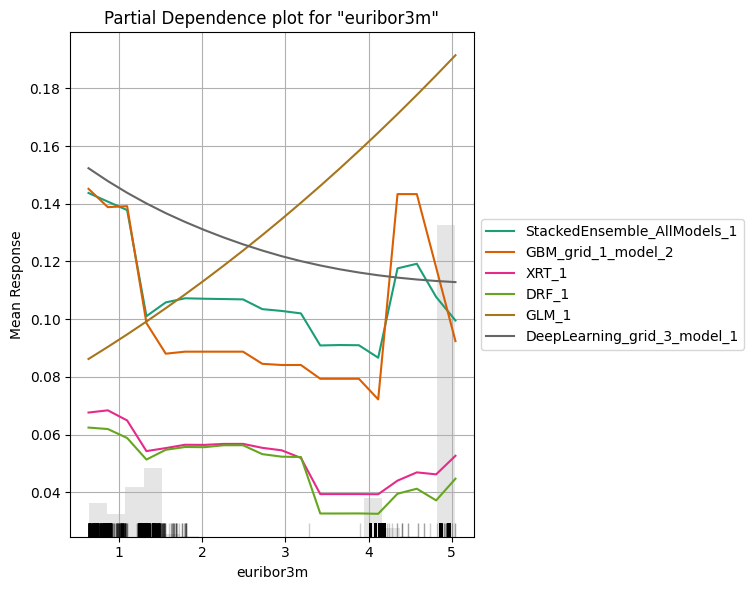

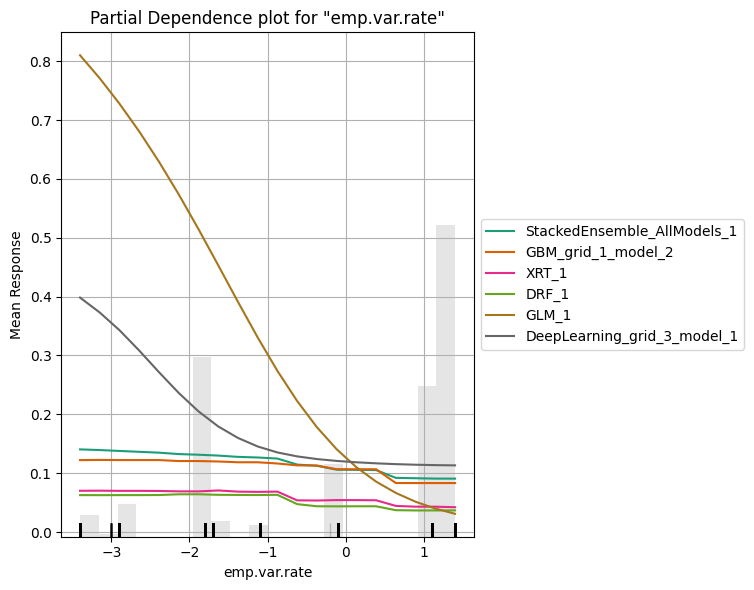

In [18]:
explain_model = aml.explain(frame = test, figsize = (8,6))

In addition, it also provides local explainability for individual records. We can input a H2OFrame into the frame argument and indicate which row we would like explained using the row_index argument. In this case we are explaining the results for row 15 of the test frame.

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict          no         yes
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------  ---------  --------  ----------
StackedEnsemble_AllModels_1_AutoML_1_20230215_210102     0.945392   0.177999  0.636097                0.152827  0.239415  0.0573195               11643                   0.058333  StackedEnsemble  no         0.995742  0.0042578
StackedEnsemble_BestOfFamily_1_AutoML_1_20230215_210102  0.945171   0.178466  0.63539                 0.167963  0.239553  0.0573856                9401                   0.016475  StackedEnsemble  no         0.996075  0.0039254
GBM_grid_1_AutoML_1_20230215_210102_model_2              0.944778   0.178888  0.636828                0.163907  0.239921  0.0575619                 960                   0.004144  GBM              no         0.996407  0.00359251
GBM_5_AutoML_1_20230215_210102                           0.943716   0.181274  0.632045                0.152697  0.24149   0.0583174                 989                   0.004665  GBM              no         0.99646   0.00354024
GBM_grid_1_AutoML_1_20230215_210102_model_7              0.942924   0.18146   0.636067                0.149478  0.241354  0.0582515                1216                   0.005006  GBM              no         0.996066  0.00393384
GBM_3_AutoML_1_20230215_210102                           0.942902   0.18695   0.620842                0.158345  0.244957  0.0600039                 966                   0.003327  GBM              no         0.997492  0.00250773
GBM_grid_1_AutoML_1_20230215_210102_model_6              0.942888   0.182642  0.618027                0.145478  0.242338  0.0587278                 927                   0.007317  GBM              no         0.997225  0.0027748
GBM_grid_1_AutoML_1_20230215_210102_model_3              0.94287    0.182345  0.623384                0.14624   0.242595  0.0588521                 875                   0.004432  GBM              no         0.996428  0.00357199
GBM_2_AutoML_1_20230215_210102                           0.942863   0.183616  0.62032                 0.147758  0.24365   0.0593652                 849                   0.005777  GBM              no         0.996441  0.00355935
GBM_1_AutoML_1_20230215_210102                           0.941563   0.188151  0.617839                0.156151  0.245786  0.0604107                1405                   0.006832  GBM              no         0.997677  0.0023232
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

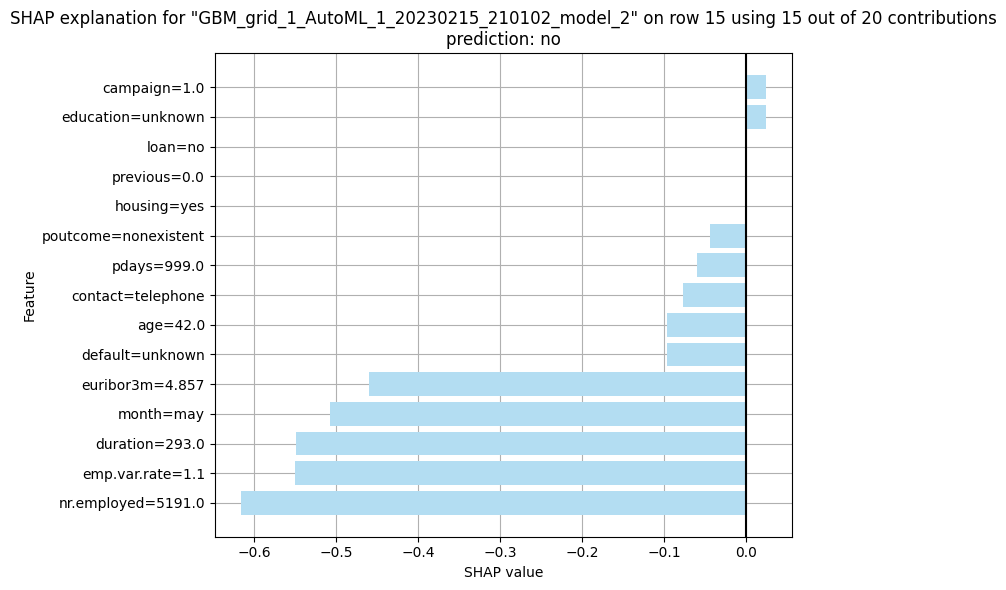

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict          no         yes
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------  ---------  --------  ----------
StackedEnsemble_AllModels_1_AutoML_1_20230215_210102     0.945392   0.177999  0.636097                0.152827  0.239415  0.0573195               11643                   0.058333  StackedEnsemble  no         0.995742  0.0042578
StackedEnsemble_BestOfFamily_1_AutoML_1_20230215_210102  0.945171   0.178466  0.63539                 0.167963  0.239553  0.0573856                9401                   0.016475  StackedEnsemble  no         0.996075  0.0039254
GBM_grid_1_AutoML_1_20230215_210102_model_2              0.944778   0.178888  0.636828                0.163907  0.239921  0.0575619                 960                   0.004144  GBM              no         0.996407  0.00359251
GBM_5_AutoML_1_20230215_210102                           0.943716   0.181274  0.632045                0.152697  0.24149   0.0583174                 989                   0.004665  GBM              no         0.99646   0.00354024
GBM_grid_1_AutoML_1_20230215_210102_model_7              0.942924   0.18146   0.636067                0.149478  0.241354  0.0582515                1216                   0.005006  GBM              no         0.996066  0.00393384
GBM_3_AutoML_1_20230215_210102                           0.942902   0.18695   0.620842                0.158345  0.244957  0.0600039                 966                   0.003327  GBM              no         0.997492  0.00250773
GBM_grid_1_AutoML_1_20230215_210102_model_6              0.942888   0.182642  0.618027                0.145478  0.242338  0.0587278                 927                   0.007317  GBM              no         0.997225  0.0027748
GBM_grid_1_AutoML_1_20230215_210102_model_3              0.94287    0.182345  0.623384                0.14624   0.242595  0.0588521                 875                   0.004432  GBM              no         0.996428  0.00357199
GBM_2_AutoML_1_20230215_210102                           0.942863   0.183616  0.62032                 0.147758  0.24365   0.0593652                 849                   0.005777  GBM              no         0.996441  0.00355935
GBM_1_AutoML_1_20230215_210102                           0.941563   0.188151  0.617839                0.156151  0.245786  0.0604107                1405                   0.006832  GBM              no         0.997677  0.0023232
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [19]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6))